# HW 4 




# Task 4.1: 

# Handwritten Digits Classification

## Overview
Implementing a Neural Network for classifying handwritten digits using the 3D MNIST dataset, with a focus on PyTorch for model development and accuracy assessment.

### Dataset
- Utilize the [3D MNIST dataset from Kaggle](https://www.kaggle.com/datasets/daavoo/3d-mnist) for training and testing the model.

### Neural Network Implementation with PyTorch
- Implement a Neural Network using PyTorch. 
- Ensure the network is suitable for handling the 3D data structure of the dataset.
- Tailor the architecture to effectively learn from the dataset for digit classification.

### Accuracy Calculation
- After training, evaluate the model on a test set.
- Calculate the accuracy of the model: $$\frac{\text{Number of Correct Predictions}}{\text{Total Predictions}}$$.
- Document the model's performance and any insights gained during the development process.


In [2]:
import torch
import torch.nn as nn
import h5py
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.datasets import DatasetFolder
from torch.utils.data import DataLoader, Dataset

c:\Users\Sanya\kapitonnov_nn_n00b\neural_n00b\nn_n00b_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
with h5py.File('data/3d_mnist/full_dataset_vectors.h5', 'r') as file:
    datasets_names = list(file.keys())
    print(datasets_names)
    X_train, y_train, X_test, y_test = file['X_train'][:], file['y_train'][:], file['X_test'][:], file['y_test'][:]

['X_test', 'X_train', 'y_test', 'y_train']


C:\Users\Sanya\AppData\Local\Temp\ipykernel_22836\2781110297.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axis.scatter(z.numpy(), y.numpy(), x.numpy() + color_index, cmap=color_map[color_index], s=100)


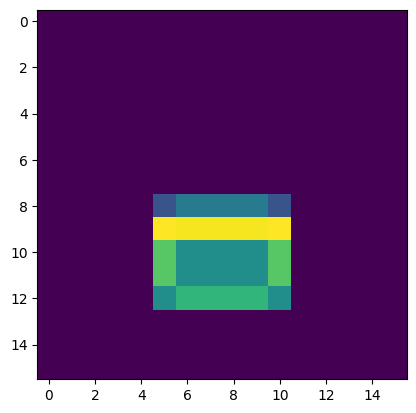

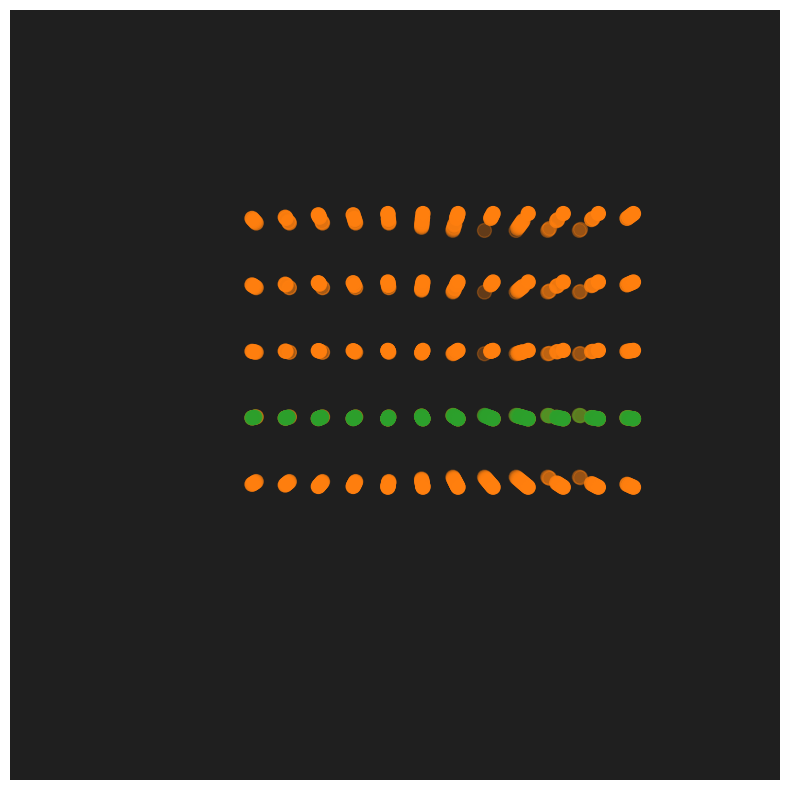

In [83]:
# int(input("Enter a random number from 0-1000: "))
arr = np.transpose(X_train[8].reshape((16, 16, 16)), (0,1,2))

plt.imshow(arr[0])

def plot_channel(channel, color_index, axis, small_tensor):
        """
        Plot a specific RGB channel in 3D space using a scatter plot.

        Parameters:
            channel (torch.Tensor): Input channel tensor.
            color_index (int): Index representing the color channel (0 for Red, 1 for Green, 2 for Blue).
            axis (matplotlib.axes._subplots.Axes3D): 3D plot axis.
            small_tensor (torch.Tensor): Downsampled input tensor for visualization.

        Returns:
            None
        """
        color_map = {0: 'Blues_r', 1: 'Greens_r', 2: 'Reds_r'}
        z, y, x = channel.nonzero(as_tuple=True)
        values = small_tensor[z, y, x].numpy()
        axis.scatter(z.numpy(), y.numpy(), x.numpy() + color_index, cmap=color_map[color_index], s=100)

def visualize_3d_channels(stacked_tensor, stride=5):
    """
    Visualize RGB channels of a stacked tensor in 3D space using a scatter plot.

    Parameters:
        stacked_tensor (torch.Tensor): Input stacked tensor with RGB channels.
        stride (int): Downsampling factor for visualization.

    Returns:
        None
    """
    # Down-sample the tensor for visualization
    tensor_small = stacked_tensor[::stride, ::stride, :-1]

    # Split the tensor into RGB channels
    r_channel, g_channel, b_channel = tensor_small.chunk(3, dim=2)

    fig = plt.figure(figsize=(10, 10))
    plot_axis = fig.add_subplot(111, projection='3d')

    for color_index, channel in enumerate([r_channel, g_channel, b_channel]):
        plot_channel(channel=channel, color_index=color_index, axis=plot_axis, small_tensor=tensor_small)

    plot_axis.set_facecolor('#1f1f1f')
    plot_axis.set_axis_off()
    plot_axis.view_init(elev=0, azim=0)
    plt.show()

visualize_3d_channels(stacked_tensor=torch.Tensor(arr), stride=1)

In [ ]:
# Datasets and DataLoaders


In [ ]:
# NN architecture
class Convolutional_3d(nn.Module):
    def __init__(self, input_layers, hidden_layers, output_layers, number_of_class=0):
        super(Convolutional_3d, self).__init__()
        self.conv3d_block = nn.Sequential(
            nn.Conv3d(in_channels=input_layers, out_channels=hidden_layers, kernel_size=(3, 3, 3), stride=1, padding=1),
            nn.ReLu(),
            nn.MaxPooling3d(),
            nn.Conv3d(in_channels=hidden_layers, out_channels=hidden_layers, kernel_size=(3, 3, 3), stride=1, padding=1),
            nn.ReLu(),
            nn.MaxPooling3d(),
            nn.Conv3d(in_channels=hidden_layers, out_channels=output_layers, kernel_size=(3, 3, 3), stride=1, padding=1),
            nn.ReLu(),
            nn.MaxPooling3d()
        )
        self.classifier_block = nn.Sequential(
            nn.Flatten(),
            nn.Linear(),
            nn.Relu(),
            nn.Linear(),
            nn.Relu(),
            nn.Linear(),
            nn.Relu()
        )